<a href="https://colab.research.google.com/github/pschofield2/machine_learning/blob/main/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems

A classification problem is where you try to classify something as one thing or another

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1,000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state = 42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now, let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


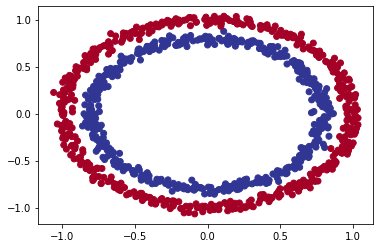

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input and Output Shapes

In [ ]:
# Check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X),len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modeling

The steps in modeling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate
7. Tweak

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
# set random seed
tf.random.set_seed(42)

#1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Let's try and improve our model by training for longer..
model_1.fit(X,y,epochs=200,verbose=0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy, it's performing as if it's guessing.

So let's step things up a notch and add an extra layer

In [ ]:
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# fit the model
model_2.fit(X,y,epochs = 100,verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units within a layer.
2. Compile a model - here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training longer).

In [ ]:
tf.random.set_seed(42)

# create model (this time 3 layers)
model_3 = tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(100), #add 100 dense neurons
                                  tf.keras.layers.Dense(10), # add another with 10 neurons
                                  tf.keras.layers.Dense(1)    
])

#2. Compile
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit
model_3.fit(X,y,epochs=100,verbose = 0)

In [ ]:
# Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X), and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max = X[:, 0].min() - 0.1, X[:,0].max()+0.1
  y_min,y_max = X[:, 1].min() - 0.1, X[:,1].max()+0.1

  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  
  # Create X value (we're going to make predictions on these)

  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
  

doing binary classification


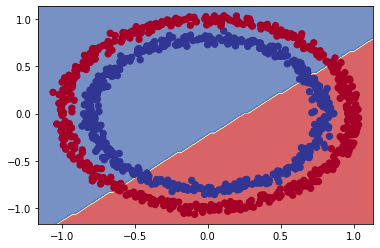

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
# set random seed
tf.random.set_seed(42)

#1 create the model
model_3 = tf.keras.models.Sequential([
                                      tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# fit model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Oh wait...we compiled our model for a binary classification problem.

But..we're now working on a regression problem, let's change the model to suit our data

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

#plot the model's predictions
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b", label = "Training Data")
plt.scatter(X_reg_test,y_reg_test,c="g", label = "Test Data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label = "Predictions")
plt.legend();

ValueError: ignored

## The missing piece: Non-Linearity

In [ ]:
# set seed
tf.random.set_seed(42)

# create model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1,tf.keras.activations.linear)
])

#2 compile model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

#3 fit the model
history = model_4.fit(X,y,epochs=100)

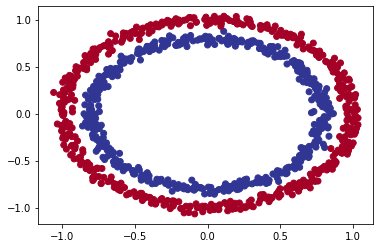

In [ ]:
# check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

doing binary classification


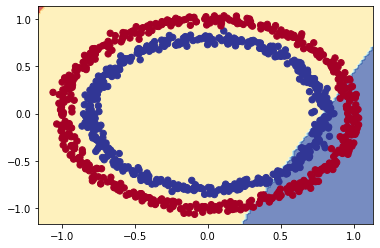

In [ ]:
# check our decision boundary for our latest model
plot_decision_boundary(model_4,X=X,y=y)

Let's try to build our first neural network with a non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1,activation = "relu")
])

#2.Compile model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

#3. fit the model
history = model_5.fit(X,y,epochs=100)

In [ ]:
# time to replicate model in tensorflow playground

#set seed
tf.random.set_seed(42)
# build model
model_6 = tf.keras.models.Sequential([
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(1)
])

#compile
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit model
history_6 = model_6.fit(X,y,epochs=250)

In [ ]:
# evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


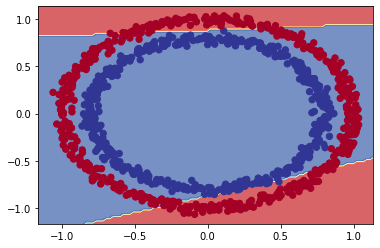

In [ ]:
# How do our model predictions look?
plot_decision_boundary(model_6,X=X,y=y)

In [ ]:
# Set random Seed
tf.random.set_seed(42)

#1 create a model
model_7 = tf.keras.models.Sequential([
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

# compile model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit model
history = model_7.fit(X,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [ ]:
# evaluate model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classification


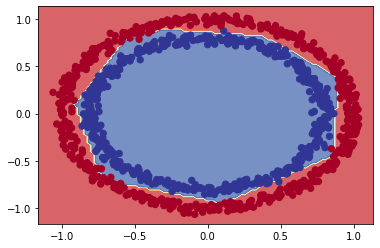

In [ ]:
# visualize
plot_decision_boundary(model_7,X=X,y=y)

**Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**Note:** the combination of linear (straight lines) and non linear (non straight lines) is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non linear functions, lets see them in action.

In [ ]:
# create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

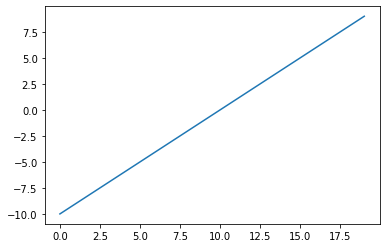

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# lets start by replicating sigmoid

def sigmoid(x):
  return 1/(1+tf.exp(-x))

# use sigmoid on toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

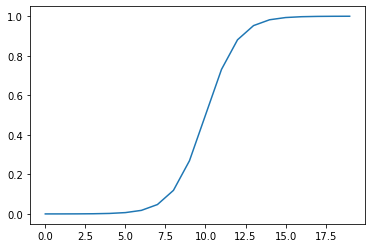

In [ ]:
# plot our A toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# lets re-create relu function
def relu(x):
  return tf.maximum(0,x)

# pass toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

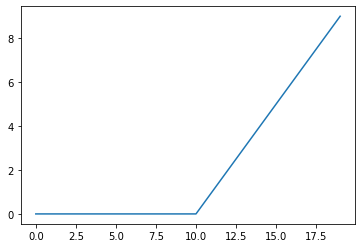

In [ ]:
# plot relu modified tensor
plt.plot(relu(A))

## Evaluating and Improving our classification model

So far we've been training and testing on the same dataset...

However, in ML this is basically a sin.

So let's create a training and test set.

In [ ]:
# check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# let's create a model to fit on the training data and evaluate on the testing data
tf.random.set_seed(42)

#1. create the model (same as model_7)
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid")
])
# 2. compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]

)

# 3. Fit the model

history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [ ]:
#4. Evaluate the model on the test dataset
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


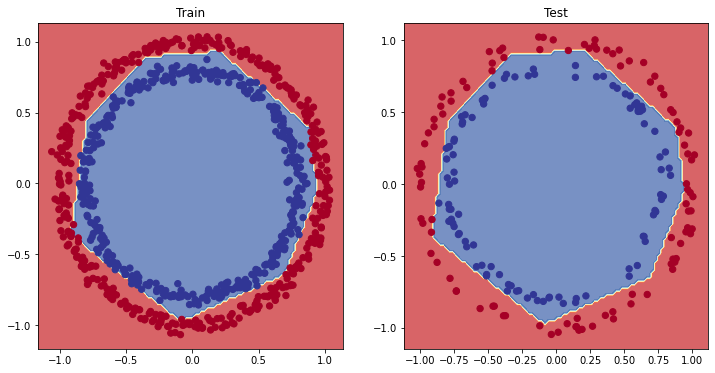

In [ ]:
# Plot the decision boundaries for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)

## Plot the loss (or training) curves

In [ ]:
# convert history object into dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

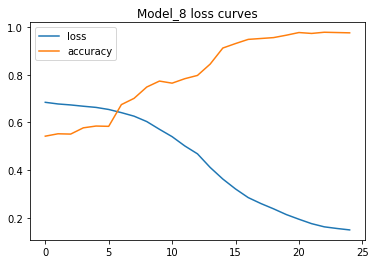

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** for many problems, the loss function going down means the model is improving (the predictions it is making are getting closer to ground truth values)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model *while* it's training
* Another model (we could use the same one as above, but were practicing building models here)
* A modified loss curve plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model 8)

model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

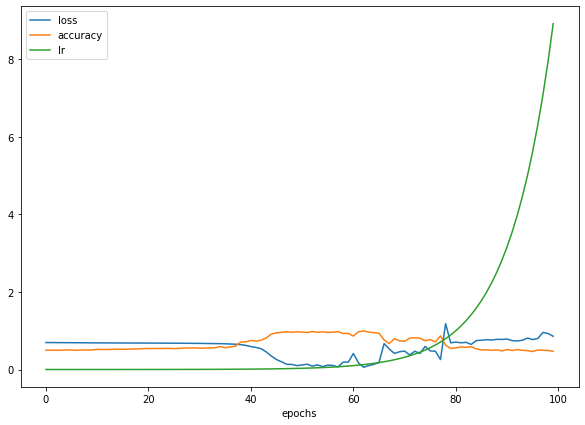

In [ ]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

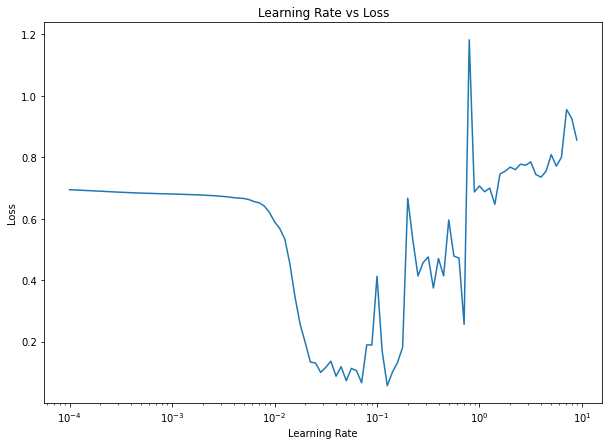

In [ ]:
# Plot the learning rate vs the loss
lrs=1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model

#set seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4,activation="relu"),
                                tf.keras.layers.Dense(4,activation="relu"),
                                tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile w/ 0.02 lr
model_10.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

# fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train,y_train,epochs=20)



Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model 10 on the test data
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [ ]:
# Evaluate model 8 on the test data
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


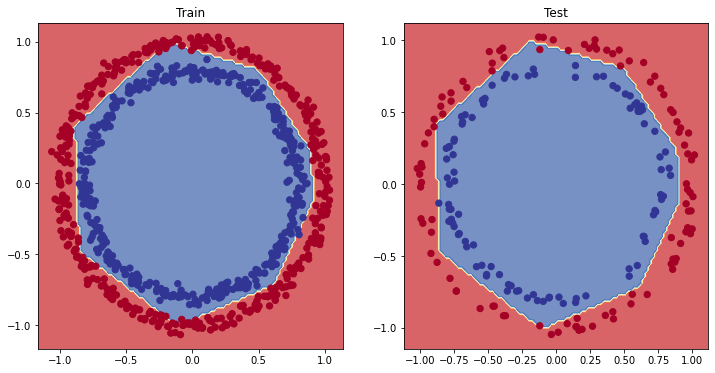

In [ ]:
# Plot the decision boundaries for the train and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

## More classification evaluation methods

alongside visualizing our model results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 99.00%


How about a confusion matrix

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test,y_preds)

ValueError: ignored

In [ ]:
y_test[:10]

In [ ]:
y_preds[:10]

Ooops. looks like our predictions array has come out in prediction probability form....the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert our prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How about we prettify our confusion matrix?

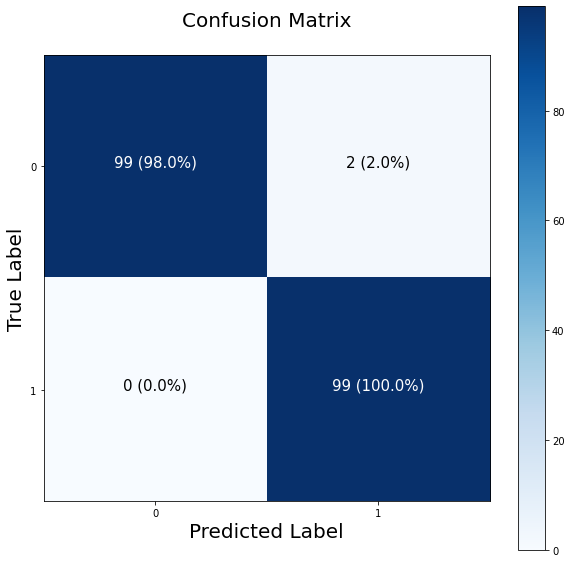

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix function

import itertools

figsize = (10,10)

# create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# lets prettify it
fig, ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# lets label the axis
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels = labels,
       yticklabels =labels)

# set axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust the label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

In [ ]:
cm[i,j]

99

In [ ]:
def cm(true_labels,predicted_labels):
  figsize = (10,10)
  import itertools
  from sklearn.metrics import confusion_matrix
# create the confusion matrix
  cm = confusion_matrix(true_labels,tf.round(predicted_labels))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

# lets prettify it
  fig, ax = plt.subplots(figsize=figsize)
# create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

# Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

# lets label the axis
  ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels = labels,
       yticklabels =labels)

# set axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

# adjust the label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

# set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

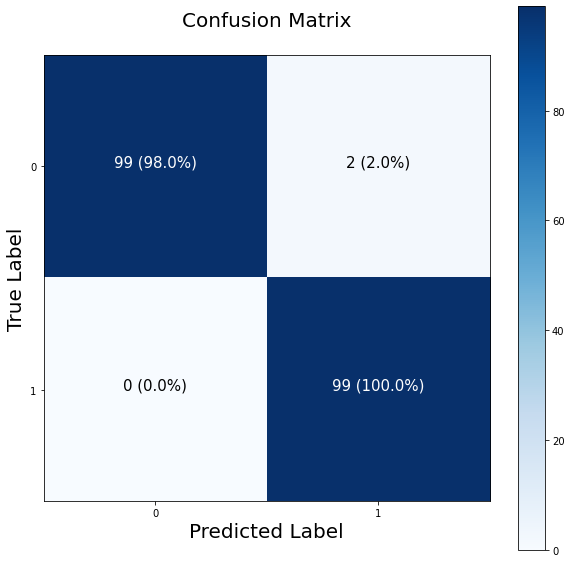

In [ ]:
cm(true_labels=y_test,
   predicted_labels=y_preds)

# Working with a larger example (multi-class classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

* This means any class size greater than 2 is multi-class classification

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

**Labels**

* 0 - t-shirt/top
* 1 - trouser
* 2 - pullover
* 3 - dress
* 4 - coat
* 5 - sandal
* 6 - shirt
* 7 - sneaker
* 8 - bag
* 9 - ankle boot

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")



Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

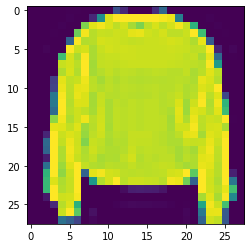

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# check our samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

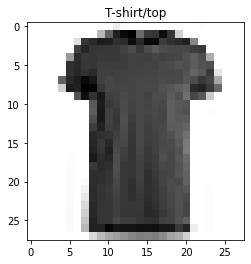

In [ ]:
# Plot an example image and it's label
index_of_choice = 17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

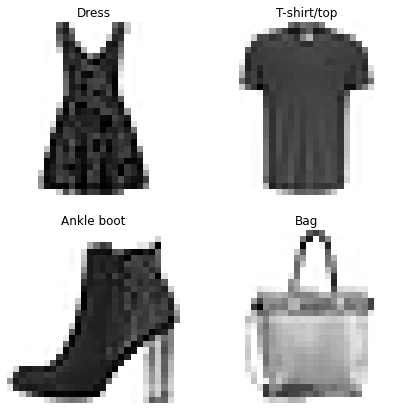

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:  

* Input shape = 28 x 28 (the shape of one image, train_data[0].shape)
* Output shape = 10 (len(class_names)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * if your labels are one-hot encoded, use CategoricalCrossentropy()
  * if your labels are integer format, use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# Our data needs to be flattened (from 28,28 to None,784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28 * 28

784

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of training data
train_data.min(),train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns in between 0 and 1

In [ ]:
# we can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min and max values of the scaled training data
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# create a model (same as model 11)
model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation="relu"),
                                tf.keras.layers.Dense(4,activation="relu"),
                                tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

>🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (0&1)

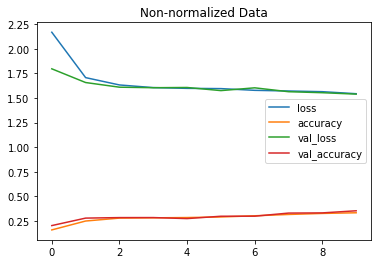

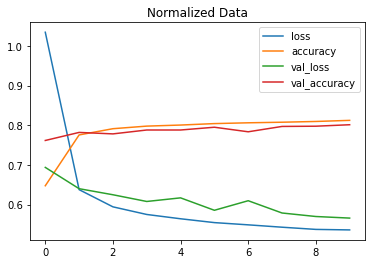

In [ ]:
import pandas as pd
# plot non-norm data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria

## Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation="relu"),
                                tf.keras.layers.Dense(4,activation="relu"),
                                tf.keras.layers.Dense(10,activation="softmax")
])

# compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the ideal learning rate')

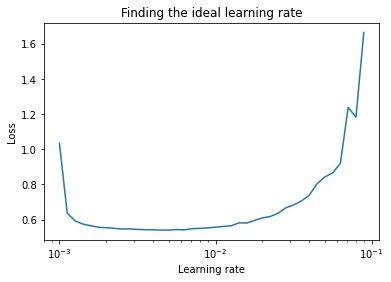

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
10**-3

0.001

In [ ]:
# Let's refit a model with the ideal learning rate

# set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation="relu"),
                                tf.keras.layers.Dense(4,activation="relu"),
                                tf.keras.layers.Dense(10,activation="softmax")
])

# compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ["accuracy"])

history_14 = model_14.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model, we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* asses some of its predictions (through visualizations)
* improve its results (by training it for longer or changing the architecture)
* save and export it for use in an application

Let's go through the top 2....

In [ ]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  # create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # lets prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

# set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # lets label the axis
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels = labels,
        yticklabels =labels)

  # set axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust the label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for probabilities

# view the first 5 predictions
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

**Note:** remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first ten prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

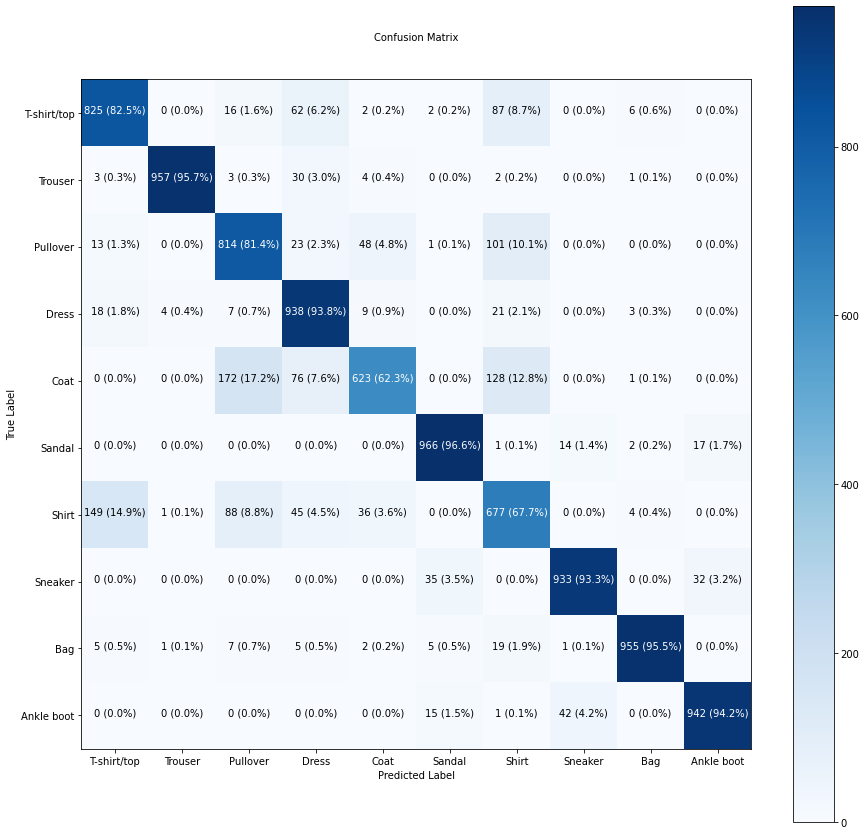

In [ ]:
# Make a prettier confusion matrix

make_confusion_matrix(y_true=test_labels,
                      y_pred = y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

> 🔑 **Note** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot random image
* Make a prediction on said image
* label the plot with the truth label & the predicted label

In [ ]:
import random
def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # set up random integer
  i = random.randint(0,len(images))

  # create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100 *tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

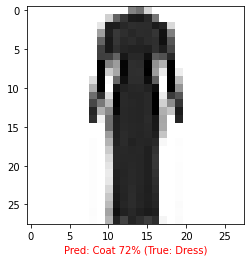

In [ ]:
# check out a random image as well as it's prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights,biases = model_14.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...

In [ ]:
# Bias and biases shapes
biases,biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a tensorflow dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


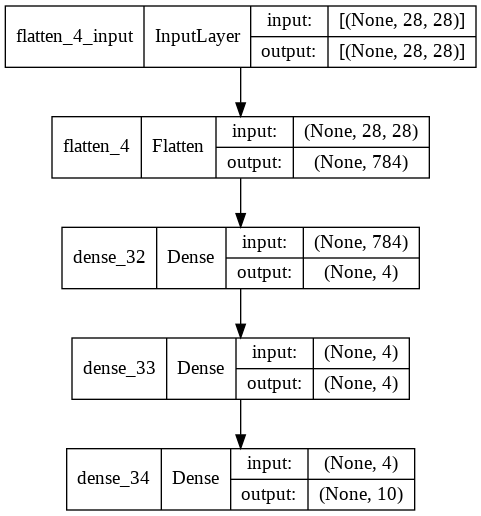

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# see the inputs and outputs of each layer
plot_model(model_14,show_shapes=True)


# Exercises

###1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

1. A small learning rate is cautious. That is, it makes the network adjust slowly and carefully.
2. A large learning rate is impetuous. That is, it adjust quickly but might be over-shooting.

###2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

Try this network out for yourself on the TensorFlow Playground website. Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.

https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.37538&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true

In [ ]:
from sklearn.datasets import make_circles
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import random


In [ ]:
n_samples = 1000
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
circles = pd.DataFrame({"X0":X[:,0],
                        "X1":X[:,1],
                        "Labels":y})
circles

,X0,X1,Labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


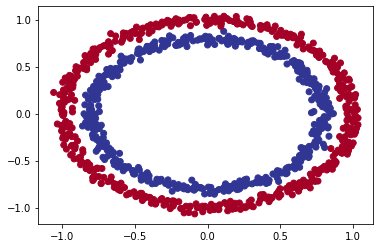

In [ ]:
plt.scatter(circles.X0,
            circles.X1,
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create model
model_a = tf.keras.Sequential([
                               tf.keras.layers.Dense(6,activation="relu"),
                               tf.keras.layers.Dense(6,activation="relu"),
                               tf.keras.layers.Dense(6,activation="relu"),
                               tf.keras.layers.Dense(6,activation="relu"),
                               tf.keras.layers.Dense(6,activation="relu"),
                               tf.keras.layers.Dense(2,activation="relu")
])

# compile
model_a.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# fit
history_a = model_a.fit(X_train,y_train,epochs=150,verbose=1)

Epoch 1/150
25/25 [==============================] - 1s 1ms/step - loss: 5.0298 - accuracy: 0.5050
Epoch 2/150
25/25 [==============================] - 0s 1ms/step - loss: 4.6242 - accuracy: 0.5000
Epoch 3/150
25/25 [==============================] - 0s 1ms/step - loss: 4.5470 - accuracy: 0.5000
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 4.4802 - accuracy: 0.5000
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 4.4171 - accuracy: 0.5000
Epoch 6/150
25/25 [==============================] - 0s 1ms/step - loss: 4.3620 - accuracy: 0.5000
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 4.3136 - accuracy: 0.5000
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 4.2791 - accuracy: 0.5000
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 4.2592 - accuracy: 0.5000
Epoch 10/150
25/25 [==============================] - 0s 2ms/step - loss: 4.2499 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_a.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 3.8637 - accuracy: 0.9550


[3.8637382984161377, 0.9549999833106995]

In [ ]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 2)                 14        
                                                                 
Total params: 200
Trainable params: 200
Non-trainable pa

###3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,
           noise = 0.03,
           random_state=42)

X[:5],y[:5]

(array([[ 0.83054947, -0.46285128],
        [ 0.6630073 ,  0.80864094],
        [ 1.01072467, -0.49553465],
        [-0.34021326,  0.94281044],
        [ 0.2782442 ,  1.02100609]]), array([1, 0, 1, 0, 0]))

In [ ]:
X.shape,X.ndim

((500, 2), 2)

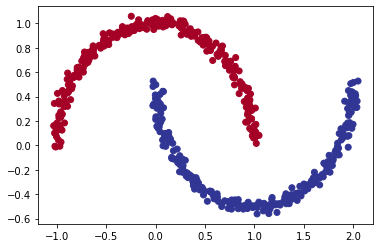

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
def plot_decision_boundary(model,X,y):
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,0].min() - 0.1, X[:,1].max() + 0.1

  xx,yy = np.meshgrid(
      np.linspace(x_min,x_max,100),
      np.linspace(y_min,y_max,100)
  )

  x_in = np.c_[xx.ravel(),yy.ravel()]

  y_preds = model.predict(x_in)

  if len(y_preds[0]) > 1:
    print("Doing multi-class classification")
    y_preds = np.argmax(y_preds,axis=1).reshape(xx.shape)

  else:
    print("Doing binary classification")
    y_preds = np.round(y_preds).reshape(xx.shape)

  plt.contourf(xx,yy,y_preds,cmap=plt.cm.RdYlBu)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

In [ ]:
moons = pd.DataFrame({"X0":X[:,0],
                      "X1":X[:,1],
                      "Labels":y})

moons[:5]

,X0,X1,Labels
0,0.830549,-0.462851,1
1,0.663007,0.808641,0
2,1.010725,-0.495535,1
3,-0.340213,0.942810,0
4,0.278244,1.021006,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# set seed
tf.random.set_seed(42)

# create model
model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(2,activation="relu")
])

model_b.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics = ["accuracy"]
)

history_b = model_b.fit(X_train,y_train,epochs=150)

Epoch 1/150
13/13 [==============================] - 1s 2ms/step - loss: 1.4479 - accuracy: 0.3325
Epoch 2/150
13/13 [==============================] - 0s 2ms/step - loss: 0.9849 - accuracy: 0.4400
Epoch 3/150
13/13 [==============================] - 0s 2ms/step - loss: 0.8308 - accuracy: 0.4475
Epoch 4/150
13/13 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.4950
Epoch 5/150
13/13 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.6825
Epoch 6/150
13/13 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.8150
Epoch 7/150
13/13 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8225
Epoch 8/150
13/13 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8225
Epoch 9/150
13/13 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.7925
Epoch 10/150
13/13 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.7600
Epoch 11/

Doing multi-class classification
Doing multi-class classification


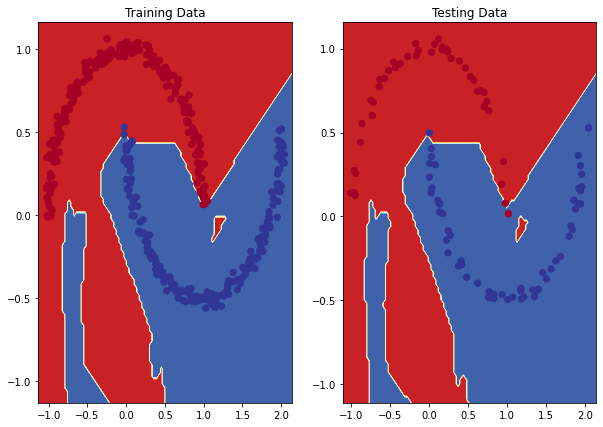

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model_b,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model_b,X_test,y_test)

In [ ]:
model_b.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9800


[0.0016971500590443611, 0.9800000190734863]

###4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# check the shape
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

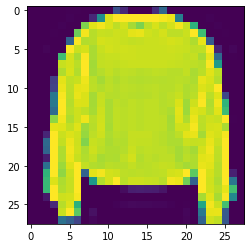

In [ ]:
plt.imshow(train_data[7]);

In [ ]:
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
len(class_names)

10

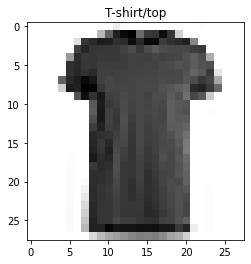

In [ ]:
plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]]);

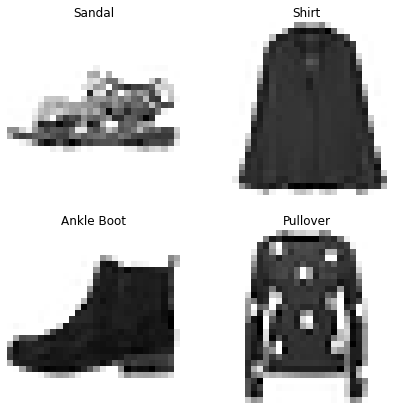

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
train_data.min(),train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data / 255
test_data_norm = test_data/255

In [ ]:
# set seed
tf.random.set_seed(42)

# create model
model_c = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(6, activation="relu"),
                               tf.keras.layers.Dense(6,activation="relu"),
                               tf.keras.layers.Dense(6,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax")
])

#compile
model_c.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_c_history = model_c.fit(train_data_norm,train_labels,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1131 - accuracy: 0.6217
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6545 - accuracy: 0.7691
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5665 - accuracy: 0.8045
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5380 - accuracy: 0.8133
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5225 - accuracy: 0.8162
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5099 - accuracy: 0.8217
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5014 - accuracy: 0.8228
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4918 - accuracy: 0.8258
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4831 - accuracy: 0.8279
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.477

In [ ]:
y_probs = model_c.predict(test_data)
y_preds = np.argmax(y_probs,axis=1)

In [ ]:
def make_confusion_matrix(y_true,
                          y_preds,
                          classes=None,
                          text_size=10,
                          figsize=(15,15)):
  
  cm = confusion_matrix(y_true = y_true, y_pred = y_preds)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel = "Predicted Label",
         ylabel = "True Label",
         xticks = np.arange(n_classes),
         yticks = np.arange(n_classes),
         xticklabels = labels,
         yticklabels = labels
         )
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j] *100:.1f}%)",
             horizontalalignment="center",
             color = "white" if cm[i,j]>threshold else "black",
             size=text_size)

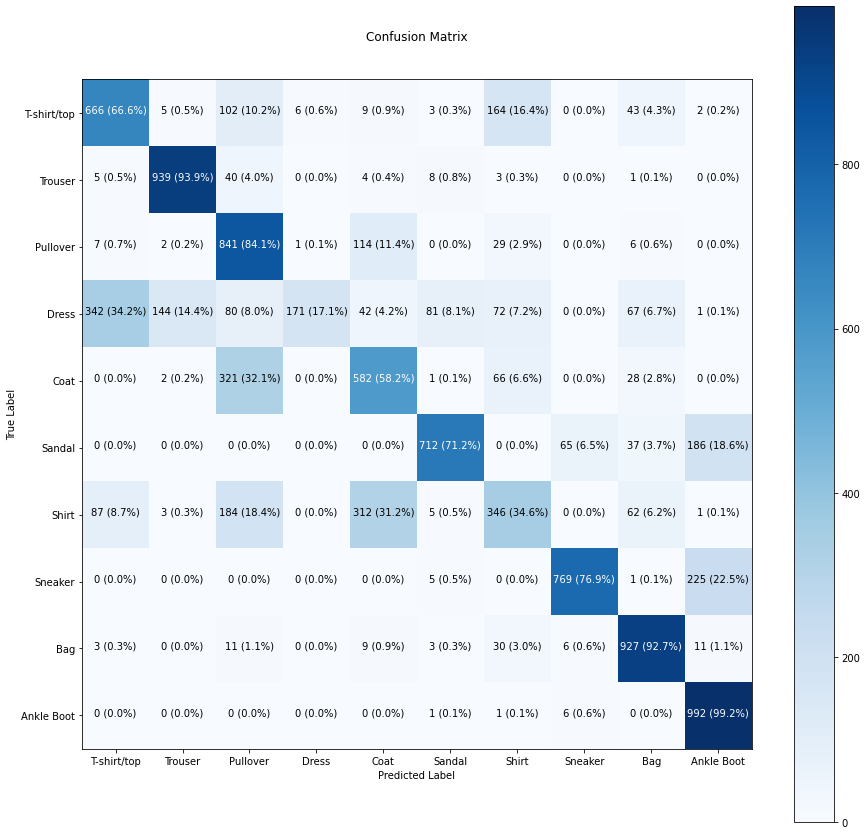

In [ ]:
make_confusion_matrix(
    y_true = test_labels,
    y_preds = y_preds,
    classes = class_names
)

# Practice

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-01-03 13:42:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   105MB/s    in 1.0s    

2022-01-03 13:42:41 (105 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np


data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a python path
data_dir

PosixPath('pizza_steak/train')

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # create target directory (we'll view images from here)
  target_folder = target_dir + target_class
  # draw random image path
  random_image = random.sample(os.listdir(target_folder),1)
  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}")

  return img
  return img

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}")

  return img

Image Shape: (512, 512, 3)


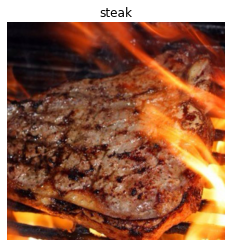

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="steak")

In [ ]:
target_dir = "pizza_steak/train/"
target_class = "steak"
target_folder = target_dir + target_class

Image Shape: (306, 512, 3)


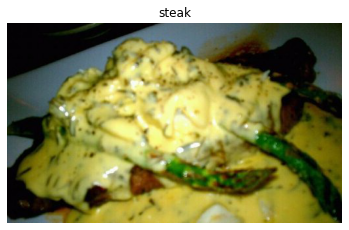

In [ ]:
img = view_random_image(target_dir=target_dir,target_class=target_class)

In [ ]:
img/255.

array([[[0.01568627, 0.00784314, 0.01960784],
        [0.01568627, 0.00784314, 0.01960784],
        [0.01568627, 0.00784314, 0.01960784],
        ...,
        [0.0627451 , 0.08235294, 0.        ],
        [0.05882353, 0.07843137, 0.        ],
        [0.05490196, 0.0745098 , 0.        ]],

       [[0.01568627, 0.00784314, 0.01960784],
        [0.01568627, 0.00784314, 0.01960784],
        [0.01568627, 0.00784314, 0.01960784],
        ...,
        [0.05490196, 0.08627451, 0.        ],
        [0.0627451 , 0.08235294, 0.        ],
        [0.06666667, 0.08627451, 0.        ]],

       [[0.01568627, 0.00784314, 0.01960784],
        [0.01568627, 0.00784314, 0.01960784],
        [0.01568627, 0.00784314, 0.01960784],
        ...,
        [0.05882353, 0.09019608, 0.        ],
        [0.07058824, 0.09019608, 0.00392157],
        [0.07843137, 0.09803922, 0.01176471]],

       ...,

       [[0.20784314, 0.31372549, 0.35686275],
        [0.22352941, 0.32941176, 0.37254902],
        [0.24705882, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN Model
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 350ms/step - loss: 0.6018 - accuracy: 0.6613 - val_loss: 0.4120 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4167 - accuracy: 0.8207 - val_loss: 0.3328 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3694 - accuracy: 0.8433 - val_loss: 0.2837 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3665 - accuracy: 0.8373 - val_loss: 0.3726 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3560 - accuracy: 0.8513 - val_loss: 0.3330 - val_accuracy: 0.8640


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
valid_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

# set seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           padding="valid",
                           activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Found 500 images belonging to 2 classes.


(array([[[[0.06666667, 0.02352941, 0.04705883],
          [0.08235294, 0.03921569, 0.0627451 ],
          [0.07450981, 0.03137255, 0.05490196],
          ...,
          [0.7137255 , 0.7294118 , 0.7411765 ],
          [0.72156864, 0.7372549 , 0.7490196 ],
          [0.70980394, 0.7254902 , 0.7372549 ]],
 
         [[0.10196079, 0.05882353, 0.07450981],
          [0.09019608, 0.04705883, 0.0627451 ],
          [0.08627451, 0.03921569, 0.05490196],
          ...,
          [0.69803923, 0.7137255 , 0.7254902 ],
          [0.7254902 , 0.7411765 , 0.75294125],
          [0.74509805, 0.7607844 , 0.7725491 ]],
 
         [[0.10588236, 0.05882353, 0.06666667],
          [0.10588236, 0.05882353, 0.06666667],
          [0.09411766, 0.04705883, 0.04705883],
          ...,
          [0.69411767, 0.70980394, 0.72156864],
          [0.7137255 , 0.7294118 , 0.7411765 ],
          [0.70980394, 0.72156864, 0.7411765 ]],
 
         ...,
 
         [[0.14901961, 0.06666667, 0.04705883],
          [0.14117

In [ ]:
def view_random_image(target_dir,target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}")

  return img

In [ ]:
view_random_image(target_dir=target_dir,target_class=target_class)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
valid_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,
                                                      kernel_size=3,
                                                      padding="valid",
                                                      activation = "relu",
                                                      input_shape=(224,224,3)),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(pool_size=2,
                                                         padding = "valid"),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=valid_data,
                        steps_per_epoch = len(train_data),
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 296ms/step - loss: 0.5885 - accuracy: 0.6707 - val_loss: 0.3892 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 12s 248ms/step - loss: 0.4219 - accuracy: 0.8140 - val_loss: 0.3532 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 13s 267ms/step - loss: 0.3857 - accuracy: 0.8367 - val_loss: 0.3061 - val_accuracy: 0.8840
Epoch 4/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3207 - accuracy: 0.8607 - val_loss: 0.2824 - val_accuracy: 0.8900
Epoch 5/5
47/47 [==============================] - 12s 250ms/step - loss: 0.2950 - accuracy: 0.8867 - val_loss: 0.3296 - val_accuracy: 0.8620


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
valid_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               class_mode="binary",
                                               target_size=(224,224),
                                               seed=42)

# set random seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,
                                                      kernel_size=3,
                                                      padding="valid",
                                                      activation="relu",
                                                      input_shape = (224,224,3)),
                               
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1,activation="sigmoid")
                               
])

# compile model
